In [166]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

In [167]:
plt.style.use('dark_background')

In [168]:
L=1.0
nx=51
dx=L/(nx-1)
a=1.22e-3
x=np.linspace(0.0, L, num=nx)
T0=np.zeros(nx)
T0[0]=100.0
CFL=np.array([0.5])
dt=CFL*dx**2/a
nt=2000
cases=len(CFL)

In [169]:
CFL

array([0.5])

(-0.5, 110.0)

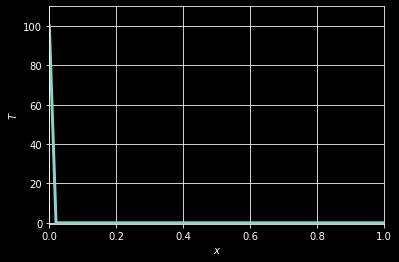

In [170]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$T$')
plt.grid()
plt.plot(x, T0, color='C0', linestyle='-', linewidth=3)
plt.xlim(0.0, L)
plt.ylim(-0.5, 110.0)

In [181]:
def ftcs(T, CFL0):
    for n in range (nt-1):
        T[n+1, 0]=T0[0]
        T[n+1, 1:-1]=T[n, 1:-1] + CFL0*(T[n, 2:]-2*T[n, 1:-1]+T[n, :-2])
        T[n+1,-1]=T[n+1, -2]
    return T

In [182]:
T_values=[]
for CFL0 in CFL:
    T=np.empty((nt, nx))
    T[0]=T0
    T=ftcs(T, CFL0)
    T_values.append(T)

In [183]:
T_values[0][3, ]

array([100. ,  62.5,  25. ,  12.5,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
         0. ,   0. ,   0. ,   0. ,   0. ,   0. ])

(-0.5, 110.0)

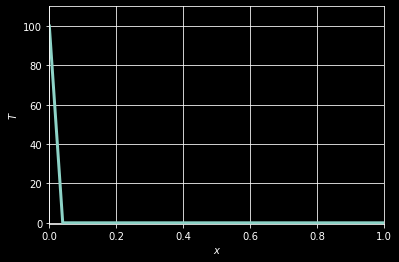

In [184]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$T$')
plt.grid()
plt.plot(x, T[1], color='C0', linestyle='-', linewidth=3)
plt.xlim(0.0, L)
plt.ylim(-0.5, 110.0)

In [185]:
T_values[0][1]

array([100.,  50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [186]:
stackT_values=T_values[0]
for n in range(cases-1):
    stackT_values=np.vstack((stackT_values, T_values[n+1]))

In [187]:
from matplotlib import animation
from IPython.display import HTML

(-0.5, 100.0)

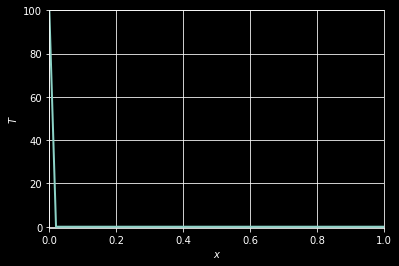

In [188]:
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$T$')
plt.grid()
line = plt.plot(x, T_values[0][0,:],
                    color='C0', linestyle='-', linewidth=2)[0]
plt.xlim(0.0, L)
plt.ylim(-0.5, 100.0)

In [189]:
def update_plot(n, stackT_values):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(stackT_values[n,:])

In [190]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt*cases, fargs=(stackT_values,),
                               interval=1)
# Display the video.
HTML(anim.to_html5_video())